<h1><center>Mini-Projet de statistiques r√©alis√© par SALIMA ZARIOUH</center></h1>


## Importation des librairies n√©cessaires

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc

## Exercice 1: Exploration des donn√©es et recherche de leur loi
### Q1 : Formation du vecteur des couts

In [184]:
# On utilise pandas pour r√©cup√©rer les donn√©es des accidents nucl√©aires en lisant le fichier csv
data = pd.read_csv('NuclearPowerAccidents2016.csv')
data.shape

(216, 8)

On remarque que notre dataframe contient 8 colonnes et 216 lignes.

In [185]:
# On utilise la fonction head() qui affiche par d√©faut les 5 premi√©res lignes pour savoir la structure de dataframe
data.head()

Date                                 Location  \
0  4/26/1986                            Kiev, Ukraine   
1  3/11/2011              Fukushima Prefecture, Japan   
2  12/8/1995                           Tsuruga, Japan   
3  3/28/1979  Middletown, Pennsylvania, United States   
4  9/11/1957                         Rocky Flats, USA   

   Cost (millions 2013US$)  INES  Smyth Magnitude Region  \
0                 259336.0   7.0              8.0     EE   
1                 166089.0   7.0              7.5      A   
2                  15500.0   NaN              NaN      A   
3                  10910.0   5.0              7.9    NaN   
4                   8189.0   5.0              5.2    NaN   

                                         Description  Fatalities  
0  Mishandled reactor safety test at Chernobyl nu...        4056  
1  An earthquake and tsunami caused emergency bac...         573  
2  Japan's only fast breeder reactor Monju suffer...           0  
3  Equipment failure and operator error contribut...           0  
4  Fire starts and destroys plutonium processing ...           0

In [186]:
# On affiche les colonnes de notre dataframe avec le type des donn√©es de chaque colonne
data.dtypes

Date                        object
Location                    object
Cost (millions 2013US$)    float64
INES                       float64
Smyth Magnitude            float64
Region                      object
Description                 object
Fatalities                   int64
dtype: object

On remarque que la colonne Date est de type objet( String ).

In [187]:
#On convertit le type de la colonne Date au type Date pour faire la comparaison avec la date de l'accident de Three Mile Island 
data['Date'] = pd.to_datetime(data['Date'])

In [188]:
# On ne grade que les lignes des accidents (strictement) avant l‚Äôaccident de Three Mile Island
date_accident = pd.to_datetime('3/28/1979')
data = data[data['Date'] < date_accident]
# On supprime les lignes o√π le cout est non renseign√©
data = data.dropna(subset=['Cost (millions 2013US$)'])

In [189]:
# Ainsi on peut construire le vecteur des couts 
couts_accidents= data['Cost (millions 2013US$)']
couts_accidents.to_numpy()
# On s'assure que le nombre des observations est bien 55
print("Le nombre des observations vaut bien %d." % len(couts_accidents))

Le nombre des observations vaut bien 55.


In [190]:
#Affichons le vecteur des couts
couts_accidents

4      8189.0
5      4400.0
6      3500.0
7      2900.0
8      2500.0
10     1964.5
11     1900.0
12     1733.4
13     1500.0
14     1330.0
15     1300.0
17     1100.0
18     1100.0
21      990.0
24      800.0
25      793.9
26      788.4
29      541.4
30      511.5
33      425.2
38      277.1
41      180.0
44      150.0
52      100.0
53      100.0
54       99.5
55       98.0
56       89.9
58       87.7
60       84.5
62       77.0
70       60.1
73       52.4
86       38.0
87       37.5
95       25.7
96       25.7
101      17.1
103      16.1
106      15.0
108      13.9
115      11.8
121      11.4
130       6.1
135       4.4
157       1.2
158       1.1
161       0.0
162       0.0
163       0.0
164       0.0
165       0.0
166       0.0
167       0.0
168       0.0
Name: Cost (millions 2013US$), dtype: float64

### Q2: Construction d‚Äôun QQ-plot normal

#### a)  Montrons que la fonction quantile d‚Äôune loi normale v√©rifie la relation donn√©e:

On sait que la fonction quantile d'une loi de probabilit√© est l'inverse de sa fonction de r√©partition.<br>
 
Notons  $ X \sim N(\mu,\sigma^2)$ et $ X_{cr} \sim N(0,1)$ est la loi centr√©e r√©duite associ√©e √† $X$:
 
Notons $ F_{1} $ la fonction de r√©partition de $X$ et $ F_{2} $ celle de $ X_{cr}$ :

Soit $p \in ]0,1[$ et $x \in \mathbf{R}$: <br>

   $$ F_{1} (x)=p \implies P(X \le  x) = p  $$ 
   
   On a : $X_{cr} = \frac{X - \mu}{\sigma}$
   
   Alors on a: $$ P( \sigma X_{cr} + \mu \le  x) = P(X_{cv} \le  \frac{x - \mu}{\sigma} )  
   \implies F_{2}( \frac{x- \mu}{ \sigma})= p $$


   D'o√π  : $$  x= F_{1}^{-1}(p) \qquad \text{et} \quad  x= F_{2}^{-1}(p)\sigma +\mu $$
  

 Et sachant que: $$ F_{1}^{-1}(p)= F^{-1}(p,\mu,\sigma^2) \qquad \text{et} \quad F_{2}^{-1}(p)=F^{-1}(p,0,1)$$
 On peut d√©duire que: $$ \forall p \in ]0,1[,  F^{-1}(p,\mu,\sigma^2)= F^{-1}(p,0,1)\sqrt{\sigma^2}+\mu$$



#### b) Le QQ-plot de donn√©es pour la loi normale:

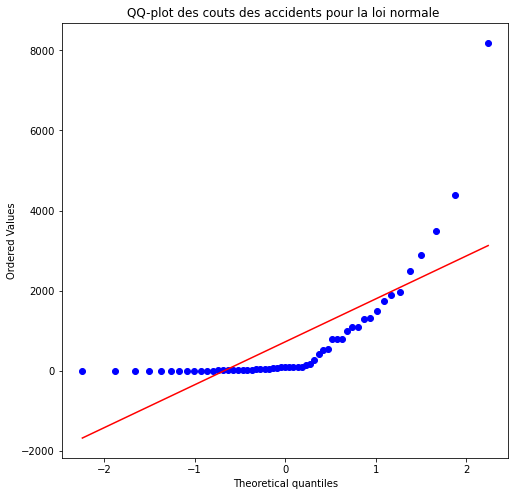

In [191]:
'''On a la fonction probplot de la librairie SciPy G√©n√®re un trac√© de probabilit√© des donn√©es
d'√©chantillon par rapport aux quantiles d'une distribution th√©orique sp√©cifi√©e:
Dans notre cas la distribution th√©orique est celle de la loi normale et les donn√©es sont les couts d'accidents form√© dans Q1'''
figure = plt.figure(figsize=(8,8)) # On pr√©cise la taille de figure qu'on souhaite r√©aliser
x = figure.add_subplot(111) # 111 pour indiquer la grille 1x1
res = sc.probplot(couts_accidents, dist='norm', plot=x)
x.set_title("QQ-plot des couts des accidents pour la loi normale ")
plt.show()

### Q2: Construction d‚Äôun QQ-plot de donn√©es pour la loi exponentielle

#### a) Montrons que le quantile d‚Äôune loi exponentielle de param√®tre Œª respecte la relation donn√©e:

Notons  $ X \sim e(\lambda)$ et $ X_{u} \sim e(1)$ :
 
Notons $ F_{1} $ la fonction de r√©partition de $X$ et $ F_{2} $ celle de $ X_{u}$ :

Soit $p \in ]0,1[$ et $x \in R$: <br>

   $$ F_{1} (x)=p \implies P(X \le  x) = p  $$ 
   
   On a : $X_{u} = \lambda X$
   
   Alors on a: $$  P(\frac{X_{u}}{\lambda} \le x) = P(X_{u} \le \lambda x ) \implies F_{2}(\lambda x) = p $$


   D'o√π  : $$ x= F_{1}^{-1}(p) \qquad \text{et} \quad  x= \frac{1}{\lambda} F_{2}^{-1}(p)$$
  

 Et sachant que: $$ F_{1}^{-1}(p)= F^{-1}(p,\lambda) \qquad \text{et} \quad F_{2}^{-1}(p)=F^{-1}(p,1) $$
 On peut d√©duire que: $$ \forall p \in ]0,1[,  F^{-1}(p,\lambda)= \frac{1}{\lambda} F^{-1}(p,1) $$


#### b) Le QQ-plot de donn√©es pour la loi exponentielle:


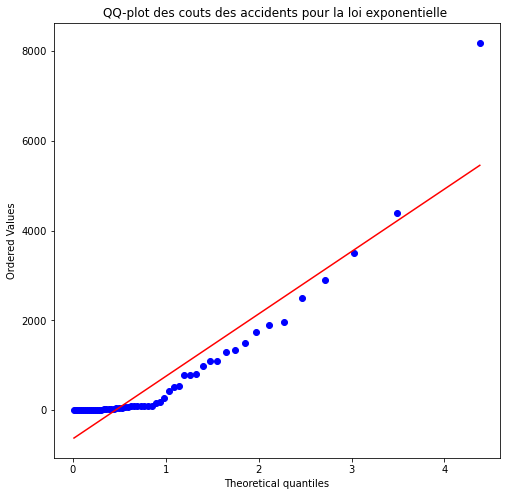

In [192]:
fig = plt.figure(figsize=(8,8))
x = fig.add_subplot(111)
res = sc.probplot(couts_accidents, dist='expon', plot=x)
x.set_title("QQ-plot des couts des accidents pour la loi exponentielle ")
plt.show()

### Q4 :Comparaison entre les deux QQ-plots

En s'appuyant sur les qq-plots obtenus, on peut d√©duire que la loi exponentielle est la plus plausible pour les donn√©es puisque la position des quantiles dans la population observ√©e est tr√©s proche √† leurs position dans le cas d'une distribution exponentielle ce qui n'est pas le cas pour la loi normale.

## Exercice 2: Estimation ponctuelle des param√®tres d‚Äôune loi exponentielle

### Q1: Calculons l‚Äôestimateur du maximum de vraisemblance $\hat{\lambda_{n}}$ :

On a : $X= (X_{1},X_{2}$,...,$X_{n}$) Avec les $ X_{i}$ sont ind√©pendants entre eux et identiquement distribu√©s:

D'o√π : $$ p(x ,\lambda)= \prod_{\substack{i=1}}^n p(x_{i},\lambda)$$
Et on sait que pour une loi exponentielle: $$p(x_{i},\lambda) = \lambda e^{-\lambda x_{i}}$$
D'o√π : $$ p(x ,\lambda)= \prod_{\substack{i=1}}^n \lambda e^{-\lambda x_{i}} = \lambda^n e^{-\lambda \sum\limits_{i=1}^n x_{i}}$$ <br>
Ce qui donne: $$  \log (p(x ,\lambda)) = n \log(\lambda) - \lambda \sum\limits_{i=1}^n x_{i} $$

Ainsi au maximum de vraissemblance, on a: $$ \frac{\partial \log{p(x ,\hat{\lambda_{n}} )}}{\partial \lambda} =0 \implies \frac{n}{\hat{\lambda_{n}}} - \sum\limits_{i=1}^n x_{i} =0$$
Et on a : $$\frac{\partial^2 \log{p(x ,\lambda )}}{\partial \lambda^2} = -\frac{n}{\lambda^2}<0$$

D'o√π $\hat{\lambda_{n}}$ est un maximum global de vraissemblance, ainsi l'estimateur de maximum de vraissemblance vaut: 

$$\hat{\lambda_{n}} = \frac{n}{\sum\limits_{i=1}^n x_{i}}$$
 

### Q2 : L'histogramme de donn√©es et la densit√© de probabilit√© de la loi exponentielle:

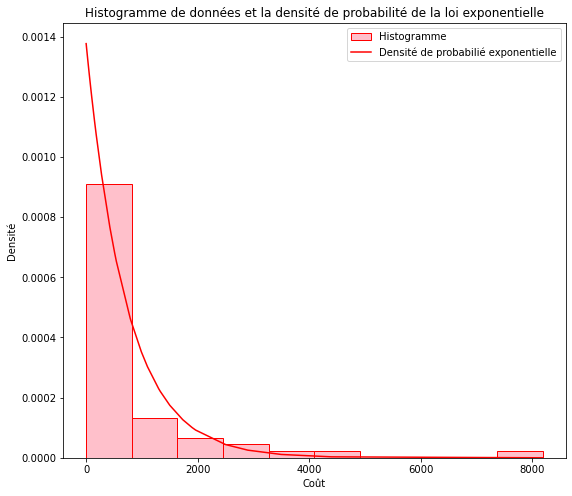

In [193]:
'''On commence par tracer l'histogramme de donn√©es en donnant au parametre de densit√© la valeur true 
pour tracer la densit√© de probabilit√© de chaque intervalle de cout'''
plt.figure(figsize=(9,8))
hist = plt.hist(couts_accidents,density=True,color="pink", edgecolor="red", label='Histogramme')
plt.title("Histogramme de donn√©es et la densit√© de probabilit√© de la loi exponentielle")
plt.xlabel("Co√ªt")
plt.ylabel("Densit√©")
# On trace par la suite la densit√© de probabilit√© de la loi exponentielle avec la densit√© estim√©e Œªn
Œªn = len(couts_accidents)/sum(couts_accidents) # On utilise l'estimation trouv√©e dans la question pr√©cedente
plt.plot(couts_accidents, sc.expon.pdf(couts_accidents,scale=1/Œªn),color="red" ,label='Densit√© de probabili√© exponentielle')
plt.legend()
plt.show()


### Q3 :  Montrons que la statistique $T_{1}(X)$ est un estimateur efficace pour $g_{1}(\lambda)$:

Pour montrer que $T_{1} (X) = \frac{1}{n}\sum\limits_{i=1}^n x_{i}$ est un estimateur efficace pour $ g_{1}(\lambda) = \frac{1}{\lambda}$ On doit montrer que: <br>
 $\qquad \quad  \bullet \quad T_{1} (X)$ est un estimateur sans biais : $$ \mathbb{E}_{\lambda} (T_{1} (X))=g_{1}(\lambda)= \frac{1}{\lambda}$$
    $\qquad  \bullet \quad$ La variance de $T_{1} (X)$ atteint la borne de Cram√©r-Rao :$$\mathbb{Var}_{\lambda}(T_{1} (X))=\frac{g_{1}'(\lambda)^{2} }{I(\lambda)} \qquad  \text {Avec } \quad I(\lambda) \text { est l'information de Fisher} $$
  
On a:  $$ \mathbb{E}_{\lambda} (T_{1} (X)) = \mathbb{E}_{\lambda}(\frac{1}{n}\sum\limits_{i=1}^n x_{i}) = \frac{1}{n} \sum\limits_{i=1}^n \mathbb{E}_{\lambda} (x_{i}) = \frac{1}{n} \sum\limits_{i=1}^n \frac{1}{\lambda} $$ 
D'o√π : $$ \mathbb{E}_{\lambda} (T_{1} (X)) = \frac{1}{\lambda} \implies T_{1} (X) \text { est bien un estimateur sans biais} $$

On a : $$\mathbb{Var}_{\lambda}(T_{1} (X))= \mathbb{Var}_{\lambda}(\frac{1}{n}\sum\limits_{i=1}^n x_{i}) = \frac{1}{n^2}\sum\limits_{i=1}^n \mathbb{Var}_{\lambda}(x_{i})= \frac{1}{n^2}\sum\limits_{i=1}^n \frac{1}{\lambda^2}  $$

D'o√π : $$ \mathbb{Var}_{\lambda}(T_{1} (X))= \frac{1}{n\lambda^2}$$
Et on a: $$g_{1}'(\lambda) = -\frac{1}{\lambda^2} \implies (g_{1}'(\lambda))^2= \frac{1}{\lambda^4}$$

Puisque $I(\lambda)=nI_1(\lambda) $ o√π $ I_1(\lambda) $ est l'information de fisher pour une seule observation et le mod√©le { $P_{\lambda},  \lambda > 0 $} est r√©gulier et $\lambda \rightarrow p_{\lambda}(x) $ est deux fois differentiable, on a:


$$I(\lambda) = - n \mathbb{E}(\frac {\partial^{2} \log p_{\lambda}(x)}{\partial \lambda^{2}} ) \; et  \;  \log (p_{\lambda}(x)) = \log(\lambda) -\lambda x$$

D'o√π: $$ I(\lambda) = \frac{n}{\lambda^2} \implies \frac{g_{1}'(\lambda)^{2} }{I(\lambda)} = \frac{\lambda^2}{n}  \frac{1}{\lambda^4} =\frac{1}{n\lambda^2}  $$

Donc: $$\mathbb{Var}_{\lambda}(T_{1} (X))=\frac{g_{1}'(\lambda)^{2} }{I(\lambda)}$$

Conclusion : $$ T_{1} (X) \text{ est un estimateur efficace de }  g_{1}(\lambda)  $$

### Q4 : Calculons g1 en utilisant T1 pour l‚Äô√©chantillon donn√©:

In [194]:
T1= sum(couts_accidents)/len(couts_accidents)
print("g1 vaut alors: %f" %T1 )

g1 vaut alors: 726.336364


### Q5 : Trouvons les valeurs  Œ∑ o√π la relation est v√©rifi√©e:

Soit $\lambda >0$, on a : $ \tilde{T_{1 , \eta}}(X) = \eta T_{1}(X) \qquad  \text{ Avec } \quad  T_{1}(X)=\frac{1}{n}\sum\limits_{i=1}^n x_{i}$ <br>
On a d√©ja montr√© dans la question pr√©c√©dente que $ T_{1}$ est un estimateur sans biais avec : $$ \mathbb{Var}_{\lambda}(T_{1} (X))= \frac{1}{n\lambda^2}$$
D'o√π : $$R(\lambda, T_{1})= \frac{1}{n \lambda^2}$$
Et on a : $$R(\lambda,\tilde{T_{1 , \eta}}) = R(\lambda, \eta T_{1}(X)) = biais(\eta T_{1}(X))^2 + \mathbb{Var}_{\lambda}( \eta T_{1} (X))$$
Avec : $$\mathbb{Var}_{\lambda}( \eta T_{1} (X))= \eta^2 \mathbb{Var}_{\lambda}(T_{1} (X)) = \frac{\eta ^2}{n \lambda^2}$$
Et: $$ bais(\eta T_{1}(X))= E_{\lambda} \left(\frac{\eta}{n}\sum\limits_{i=1}^n x_{i} -\frac{1}{\lambda}\right) = \frac{\eta}{n} \sum\limits_{i=1}^n E_{\lambda}(x_{i}) -\frac{1}{\lambda} \qquad  \text{ Avec } \quad E_{\lambda}(x_{i}) =\frac{1}{\lambda}$$
D'o√π:  $$ biais(\eta T_{1}(X)) = \frac{\eta -1}{\lambda}$$

Alors, on a: $$R(\lambda,\tilde{T_{1 , \eta}})= \left( \frac{\eta -1 }{\lambda}\right) ^2 + \frac{\eta^2}{n \lambda^2}$$

Ainsi : $$R(\lambda,\tilde{T_{1 , \eta}}) <R(\lambda, T_{1})  \implies \left(\frac{\eta -1}{\lambda} \right)^2 + \frac{\eta^2}{n\lambda^2} < \frac{1}{n\lambda^2}\implies (\eta -1)^2 < \frac{1-\eta^2}{n}$$

On a : $(\eta -1)^2 > 0 \implies 1-\eta^2 >0 \implies \eta < 1 \quad  \text{ Ainsi en divisant les deux parties de l'in√©galit√© par} \quad  1-\eta >0 $, on obtient: 
$$ 1-\eta < \frac{1+\eta}{n} \implies \eta \left(\frac{n+1}{n}\right) > \frac{n-1}{n} \implies \eta > \frac{n-1}{n+1} $$

Ainsi on conclut que l'in√©galit√© est valide pour les valeurs de $\eta \in {\left ]\frac{n-1}{n+1},1 \right[}$

Le r√©sultat trouv√© n'est pas en contradiction avec la question pr√©c√©dente car meme si on a trouv√© un estimateur dont l'erreur quadratique est inf√©rieure √† celui de $T_{1}(X)$ sur une intervalle donn√©e, cet estimateur n'est pas efficace vu qu'il est biais√© : Pour $\eta < 1$, on a: $biais( \tilde{T_{1 , \eta}}) >0$.

### Q6 : L'estimateur sans biais de la m√©diane:

Puisque la variable al√©atoire X suit une loi exponenetielle de param√©tre $\lambda$ ,la m√©diane vaut : $\frac{\ln(2)}{\lambda}$ <br>

Ainsi pour que $\tilde{T_{1 , \eta}}$ soit une loi sans biais de la m√©diane :
$$ E_{\lambda}(\tilde{T_{1 , \eta}}(X)) = \frac{\ln(2)}{\lambda} \implies \frac{\eta}{\lambda}= \frac{\ln(2)}{\lambda} \implies \eta= \ln(2) $$

##### Calculons l'estimateur $\tilde{T_{1 , \eta}} $ pour la valeur de  $\eta $ trouv√©e et le comparer avec la m√©diane empirique:

In [195]:
estimateur= np.log(2)*sum(couts_accidents)/len(couts_accidents) # On remplace ùúÇ par la valeur trouv√©e
print(" La valeur de l'estimateur de la m√©diane pour l'√©chantillon donn√© vaut : %f" %estimateur)
mediane= np.median(couts_accidents) # La valeur de la m√©diane empirique
print(" La valeur de la m√©diane empirique vaut : %f" %mediane)


 La valeur de l'estimateur de la m√©diane pour l'√©chantillon donn√© vaut : 503.458003
 La valeur de la m√©diane empirique vaut : 89.900000


On constate qu'il y a une diff√©rence importante entre la valeur de l'estimateur de m√©diane et celle de la m√©diane empirique.
Pour cette √©chantillon avec n=55, $\eta $ n'appartient pas √† l'intervalle trouv√© dans la question 5, d'o√π la valeur de risque est importante et cet estimateur n'est pas un bon estimateur.

### Q7 :  Comparons les risques quadratiques de $T_{1}(X) $ et  $\tilde{T_{1 , \eta}} $ en fonction de la taille de l'√©chantillon:

On a d√©ja montr√© dans la question 5 que: 
$$R(\lambda, T_{1})= \frac{1}{n \lambda^2} \quad \text{et } \quad  R(\lambda,\tilde{T_{1 , \eta}})= \left( \frac{\eta -1 }{\lambda}\right) ^2 + \frac{\eta^2}{n \lambda^2}$$
Alors pour $\eta= \ln(2)$, on a : $$ R(\lambda, T_{1})= \frac{1}{n \lambda^2} \quad \text{et } \quad R(\lambda,\tilde{T_{1 , \eta}}) \approx \frac{0.0941587}{\lambda^2} + \frac{0.480453}{n\lambda^2} $$
Ainsi pour comparer les deux risques, il suffit de comparer : $$\frac{1}{n} \quad \text{et } \quad 0.0941587 + \frac{0.480453}{n} $$
D'o√π on a : $$R(\lambda,\tilde{T_{1 , \eta}}) <R(\lambda, T_{1}) \implies 0.0941587 + \frac{0.480453}{n}< \frac{1}{n} \implies n < 5,51778$$

Pour notre √©chantillon avec n=55, on a l'erreur quadratique moyenne de $T_{1}$ est plus petit que celui de $\tilde{T_{1 , \eta}}$, ainsi $T_{1}$ est un estimateur meilleur que $\tilde{T_{1 , \eta}}$ pour $\eta= \ln(2)$.

## Exercice 3:Test sur le param√®tre d‚Äôune loi


### Q1: Formulons l'hypoth√©se null et l'hypoth√©se alternative:

On souhaite affirmer avec un faible risque d‚Äôerreur que le co√ªt moyen d‚Äôun accident est inf√©rieur √† un milliard de dollars, d'o√π: <br>
L'hpoth√©se null est : $$H_{0}=  \left\{ E_{\lambda}(X) < 1000 \right\} $$
Et puisque X suit une loi exponentielle de param√©tre $\lambda $  :$$ H_{0}=  \left\{\frac{1}{\lambda}< 1000 , \lambda>0 \right\} =  \left\{\lambda > 0.001  \right\}$$
Et l'hypoth√©se alternative vaut: $$ H_{1}=  \left\{ \frac{1}{\lambda} \ge 1000 ,\lambda>0 \right\} = \left\{ \lambda \le 0.001 ,\lambda>0 \right\} $$

### Q2 :  Donnons le test le plus puissant pour le niveau $\alpha$ en utilisant le principe de Neyman-Pearson:

On a : $$ L (x_{1},x_{2},...,\lambda) = \prod_{i=1}^{n} p_{\lambda}(x_{i}) =  \prod_{i=1}^{n} \lambda e^{-\lambda x_{i}} =\lambda^n  e^{-\lambda\sum\limits_{i=1}^n x_{i}}$$

Et on a d'apr√©s le th√©or√®me de Neyman-Pearson, le test le plus puissant pour le niveau $\alpha$ est d√©fini par:

$$ \frac{L (x_{1},x_{2},...,\lambda_{0})}{L (x_{1},x_{2},...,\lambda_{1})} < K_{\alpha} \implies \left( \frac{\lambda_{0}}{\lambda_{1}} \right)^n  e^{-(\lambda_{0}-\lambda_{1})\sum\limits_{i=1}^n x_{i}}  < K_{\alpha} \implies   \left( \frac{\lambda_{0}}{\lambda_{1}} \right)^n  e^{-(\lambda_{0}-\lambda_{1}) T(X)}  < K_{\alpha} \quad \text{qui est croissante en  }  \quad T(X)=\sum\limits_{i=1}^n x_{i}$$

D'o√π: $$ T(X) > \frac{log\left(K_{\alpha}\left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n\right)}{\lambda_{1}-\lambda_{0}} = C_{\alpha}\quad \text{car } \qquad \lambda_{0} > \lambda_{1}  $$ 
et puisque les $ X_{i} $ suivent une loi exponenetielle et ils sont ind√©pendants entre eux, alors :
$$ T(X) \sim \Gamma(n,\lambda)$$
Ainsi : $$\alpha = P(T(X) > C_{\alpha}) \qquad \text{Avec }  \qquad T(X) \sim \Gamma(n,\lambda) $$

### Q3: Appliquons le test pour l‚Äô√©chantillon consid√©r√© au niveau $\alpha$ = 0.05:

In [196]:
T = sum(couts_accidents) # On d√©finit T pour notre √©chantillon
C = sc.gamma.ppf(a=55,q=0.95,scale=1000)
if T> C:
    print(" T se trouve dans la zone de rejet de l'hypoth√©se H0 au niveau alpha=0.05")
else:
    print("On accepte l'hypoth√©se H0 au niveau alpha=0.05, ainsi  on peut affirmer que le co√ªt moyen d‚Äôaccident "
          "est inf√©rieur √† un milliard de dollars")


On accepte l'hypoth√©se H0 au niveau alpha=0.05, ainsi  on peut affirmer que le co√ªt moyen d‚Äôaccident est inf√©rieur √† un milliard de dollars


#### On calcule maintenant la valeur de p-valeur:

In [197]:
p_valeur = 1 - sc.gamma.cdf(T,a=55,scale=1000)
print("La valeur de p_valeur vaut %f " %p_valeur)

La valeur de p_valeur vaut 0.986283 


On trouve la valeur de p_valeur sup√©rieure √† 0,95 d'o√π $H_{0}$ ne peut pas etre rejet√©e et elle est accept√©e.

### Q4: Tra√ßons la densit√© de probabilit√© de T1 en indiquant la r√©gion du rejet au niveau Œ± = 0.05:

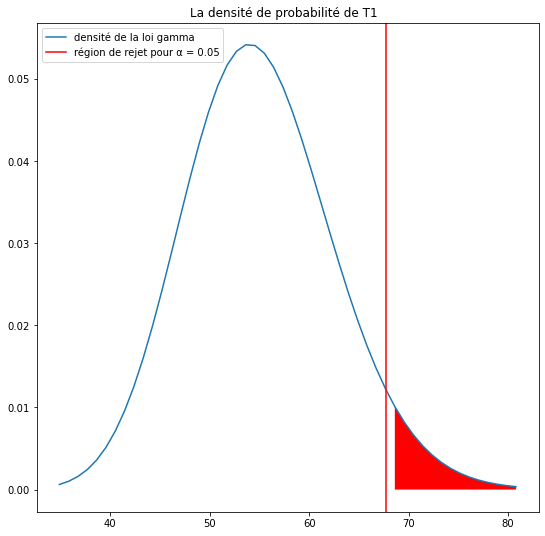

In [198]:
plt.figure(figsize=(9,9))
x=np.linspace(sc.gamma.ppf(0.001, a=55),sc.gamma.ppf(0.999, a=55))
y=sc.gamma.pdf(x, a=55) # la densit√© de probabilit√©
k=sc.gamma.ppf(0.95,a=55) # la quantile qui correspond √† 0.95
plt.plot(x,y, label="densit√© de la loi gamma")
plt.fill_between(x[x >= k], y[x >= k], facecolor='red')
plt.axvline(x = k, color = "red", linestyle = "-", label="r√©gion de rejet pour Œ± = 0.05")
plt.title("La densit√© de probabilit√© de T1  ")
plt.legend()
plt.show()

### Q5: Tra√ßons la fonction puissance de test pour le niveau $\alpha$ donn√©:

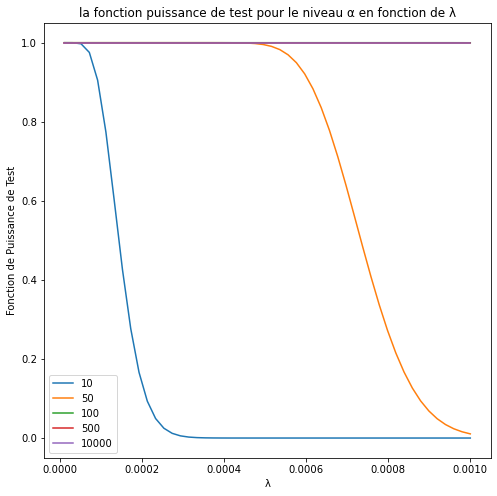

In [199]:
plt.figure(figsize=(8,8))
tailles = [10, 50, 100, 500, 10000]
x=np.linspace(0.00001,0.001) #car on s'interesse aux valeurs de lambda<0.001
k=sc.gamma.ppf(0.95,a=55,scale=1000) # retourne la quantille pour Œ± =0.05
for n in tailles :
    y=1-sc.gamma.cdf(k,a=n,scale=1/x) # La puissance est mesur√©e par 1- (la fonction de r√©partition=cdf)
    plt.plot(x,y,label=n)
plt.xlabel("Œª")
plt.ylabel("Fonction de Puissance de Test")
plt.title("la fonction puissance de test pour le niveau Œ± en fonction de Œª")
plt.legend()
plt.show()


#### Explication des r√©sultats:

On constate que lorsque $\lambda$ tend vers 0.001, les puissances pour les grandes valeurs de n tendent vers 1.

### Q6: En utilisant le th√©or√®me centrale limite, donnons une approximation de la loi de T1:

On a :$T_{1} (X) = \frac{1}{n}\sum\limits_{i=1}^n x_{i}$ d'o√π $T_{1} (X)$ pr√©sente la somme des variables al√©atoires qui suivent ind√©pendament la meme loi: <br>
Ainsi d'apr√©s le th√©or√®me de centrale limite, pour les grandes valeurs de n on a : $T_{1} (X) \sim N (\mu, \sigma^2)$ <br>
Avec : $$ \mu = E(T_{1} (X)) = \frac{1}{\lambda} \quad \text{Et } \quad \sigma^2=  \mathbb{Var}_{\lambda}(T_{1} (X))= \frac{1}{n\lambda^2}$$
D'o√π: $$T_{1} (X) \sim N (\frac{1}{\lambda}, \frac{1}{n\lambda^2})$$

#### Proposons un nouveau test et donnons son r√©sultat:

On a trouv√© dans la question 2 que la zone de rejet de l'hypoth√©se $H_{0}$ correspond √† $ T(X)=\sum\limits_{i=1}^n x_{i} > C_{\alpha}$ <br>
D√©finissons la loi centr√©e r√©duite associ√©e √† $ T(X) \sim N (\frac{n}{\lambda_{0}}, \frac{n}{\lambda_{0}^2}) $:$$T_{cr}(X) = \frac{T(X)-\frac{n}{\lambda_0}}{\frac{\sqrt{n}}{\lambda_0}} \sim N(0,1)$$
On a : $$T(X) > C_{\alpha} \implies T_{cr}(X)> \frac{C_{\alpha}-\frac{n}{\lambda_0}}{\frac{\sqrt{n}}{\lambda_0}}$$
Ainsi $ \frac{C_{\alpha}-\frac{n}{\lambda_0}}{\frac{\sqrt{n}}{\lambda_0}}$ pr√©sente le quantille d'ordre $1-\alpha$ de la loi normale centr√©e r√©duite. $ $

In [200]:
C = sc.norm.ppf(0.95)*(np.sqrt(55)/0.001)+55/0.001 # On applique la relation trouv√©e avec n=55 et ùúÜ0=0.001
if T> C:
    print(" T se trouve dans la zone de rejet de l'hypoth√©se H0 au niveau alpha=0.05")
else:
    print("On accepte l'hypoth√©se H0 au niveau alpha=0.05, ainsi  on peut affirmer que le co√ªt moyen d‚Äôaccident "
          "est inf√©rieur √† un milliard de dollars")

On accepte l'hypoth√©se H0 au niveau alpha=0.05, ainsi  on peut affirmer que le co√ªt moyen d‚Äôaccident est inf√©rieur √† un milliard de dollars


<h2><center>FIN</center></h2>